In [1]:
#import required libraries
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14,7)

#load data 
data = Table.read_table('ticket_prices.csv')
data

carrier,rtrip_fare,advance,busclass,nonrefundable,satstayover
AA,158,14,0,1,0
AA,159,52,0,1,1
AA,159,15,0,1,0
AA,160,28,0,1,1
AA,160,24,0,1,1
AA,160,28,0,1,0
AA,165,22,0,1,1
AA,165,15,0,1,0
AA,165,17,0,1,1
AA,165,26,0,1,1


In [2]:
#report summary statitics
data.stats(ops=(min,max,np.mean, np.median, np.std))

statistic,carrier,rtrip_fare,advance,busclass,nonrefundable,satstayover
min,AA,158,0,0,0,0
max,UA,1712,183,1,1,1
mean,,368.795,17.2466,0.0196766,0.984707,0.220242
median,,328,12,0,1,0
std,,179.716,18.473,0.138886,0.122716,0.414409


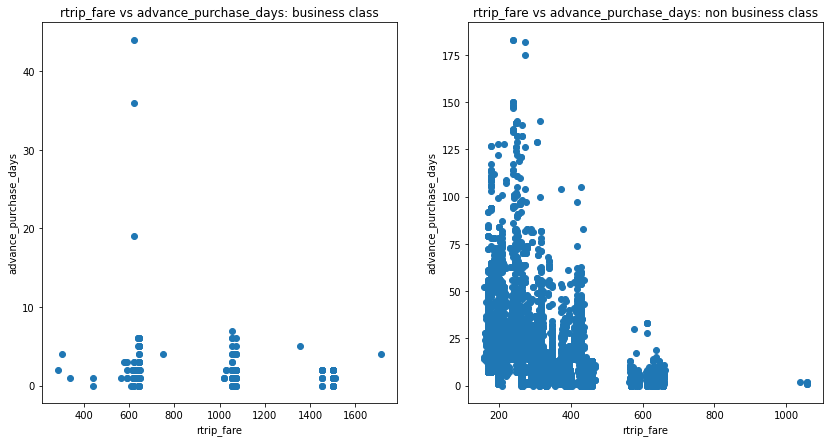

In [3]:
#Scatter plot to show the relationship between round_trip _fare and days_purchased_in_advance


#1) For business class seats
# Filter the data to only include rows where the "busclass" column is equal to 1
business_class = data.where("busclass", are.equal_to(1))

#2) For non business class 
# Filter the data to only include rows where the "busclass" column is equal to 
non_business_class = data.where("busclass", are.equal_to(0))

#create two subplots
plt.subplot(1,2,1)
# Plot the first scatter plot in the first subplot
plt.scatter(business_class["rtrip_fare"], business_class["advance"])
plt.xlabel('rtrip_fare')
plt.ylabel('advance_purchase_days')
plt.title('rtrip_fare vs advance_purchase_days: business class')

# Plot the second scatter plot in the second subplot
plt.subplot(1,2,2)
plt.scatter(non_business_class["rtrip_fare"], non_business_class["advance"])
plt.xlabel('rtrip_fare')
plt.ylabel('advance_purchase_days')
plt.title('rtrip_fare vs advance_purchase_days: non business class')


# Show the plot
plt.show()

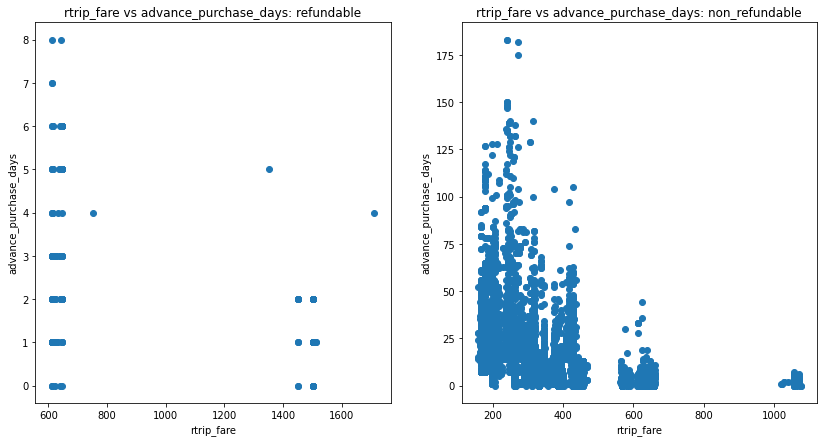

In [4]:
#3) For Refundable and non refundable air fares
#Considering: In the dataset, nonrefundable column = 1 means it is non refundable

refundable = data.where("nonrefundable", are.equal_to(0))

non_refundable  = data.where("nonrefundable", are.equal_to(1))

#create two subplots
plt.subplot(1,2,1)
# Plot the first scatter plot in the first subplot
plt.scatter(refundable["rtrip_fare"], refundable["advance"])
plt.xlabel('rtrip_fare')
plt.ylabel('advance_purchase_days')
plt.title('rtrip_fare vs advance_purchase_days: refundable')

# Plot the second scatter plot in the second subplot
plt.subplot(1,2,2)
plt.scatter(non_refundable["rtrip_fare"], non_refundable["advance"])
plt.xlabel('rtrip_fare')
plt.ylabel('advance_purchase_days')
plt.title('rtrip_fare vs advance_purchase_days: non_refundable')


# Show the plot
plt.show()

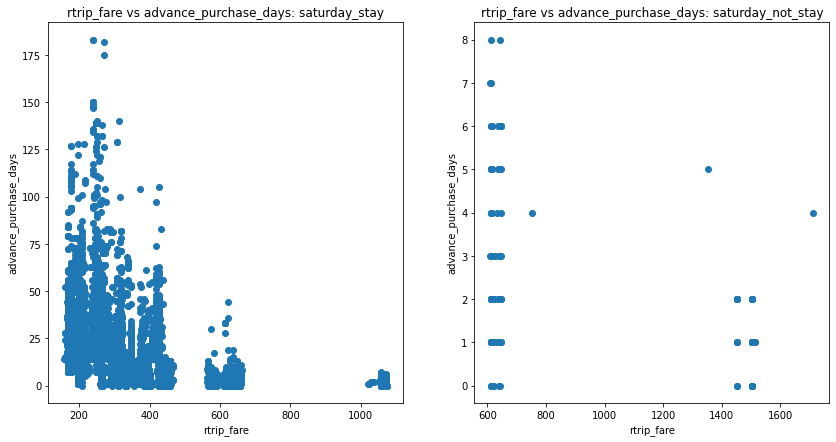

In [5]:
#4) For saturday night stayover and not
saturday_stay = data.where("nonrefundable", are.equal_to(1))

saturday_not_stay  = data.where("nonrefundable", are.equal_to(0))

#create two subplots
plt.subplot(1,2,1)
# Plot the first scatter plot in the first subplot
plt.scatter(saturday_stay["rtrip_fare"], saturday_stay["advance"])
plt.xlabel('rtrip_fare')
plt.ylabel('advance_purchase_days')
plt.title('rtrip_fare vs advance_purchase_days: saturday_stay')

# Plot the second scatter plot in the second subplot
plt.subplot(1,2,2)
plt.scatter(saturday_not_stay["rtrip_fare"], saturday_not_stay["advance"])
plt.xlabel('rtrip_fare')
plt.ylabel('advance_purchase_days')
plt.title('rtrip_fare vs advance_purchase_days: saturday_not_stay')


# Show the plot
plt.show()

In [6]:
# To answer MCQ question 3
criteria = [business_class, non_business_class,refundable,non_refundable,saturday_stay,saturday_not_stay]

#to store the average of round trip fare under all conditions
avg = []


for criterion in criteria:
    avg.append(criterion.column("rtrip_fare").mean())


print(f'Maximum average round trip fare is {max(avg)} for criteria {avg.index(max(avg))} ')
#0th criteria is for business_class


Maximum average round trip fare is 954.4554455445544 for criteria 0 


In [7]:
# To answer MCQ question 4 & 5 
criteria = [business_class, non_business_class,refundable,non_refundable,saturday_stay,saturday_not_stay]

#to store the deviation in round trip fare  under all conditions
stds = []

for criterion in criteria:
    stds.append(np.std(criterion.column("rtrip_fare")))


print(f'Maximum variation in round trip fare is {max(stds)} for criteria {stds.index(max(stds))}')
#2th criteria is for refundable


print(f'Minimum variation in  round trip fare is {min(stds)} for criteria {stds.index(min(stds))}')
#1th criteria is for non_business class



Maximum variation in round trip fare is 401.05719283137387 for criteria 2
Minimum variation in  round trip fare is 152.74019899276013 for criteria 1


In [8]:
# to answer question 6

#find total rows in the data table for refundable
#find totol rows in the whole dataset
#And divide 1st one by the 2nd one

prob_R = (refundable.num_rows/data.num_rows)*100

print(f'Required probability is: {round(prob_R,2)}%')


Required probability is: 1.53%


In [9]:
#To answer question 7:

prob_B = business_class.num_rows/data.num_rows

#filter the dataset under the conditions of both business class and refundable 
business_class_and_refundable = data.where("busclass", 1).where("nonrefundable",0)

#So, now find the joint probability
prob_R_and_B = business_class_and_refundable.num_rows/data.num_rows

#Now calculte rthe required probability
prob_R_given_B = prob_R_and_B/prob_B

print(f'Required probability is: {round(prob_R_given_B,2)}%')


Required probability is: 0.36%


In [10]:
# To answer question 8 and 9

#find the correlation 
criteria = [business_class, non_business_class,refundable,non_refundable,saturday_stay,saturday_not_stay]

corrs = []

for c in criteria:
    #correlation = c.column("rtrip_fare").correlation(c.column("advance"))
    correlation = np.corrcoef(c.column("rtrip_fare"), c.column("advance"))
    corrs.append(correlation[0][1])

print(corrs)
#all have negative correlations

[-0.17812495592133318, -0.52104829391168628, -0.43707574697807711, -0.51095557845829642, -0.51095557845829642, -0.43707574697807711]
